## Práctica 3: Procesamiento de imágenes

Integrantes: Alejandro Bolaños García y David García Diaz

## 1)

El negativo de una imagen es el resultado de aplicar la
siguiente operación: 255-imagen(i,j). Aplica esta operación
sobre la `imagen2.png` y, posteriormente, crea un video
que vaya mezclando las dos imágenes por columnas, de
forma que aparezca primero el negativo de la imagen y vaya
apareciendo poco a poco la imagen original. El número de
iteraciones debe ser igual al ancho de la imagen y en cada
una se debe ir desplazando una columna a la derecha la
imagen original sobre el negativo. Guarda el vídeo con el
nombre `vídeo2.mp4`. (2.0 puntos) 

In [ ]:
import numpy as np
import cv2 as cv

# Cargar la imagen
fichero = 'material_pract3/imagen2.png' #Imagen en color
imagen = cv.imread(fichero)

# Invertir los colores de la imagen
imagen_invertida = 255-imagen

alto, ancho, canales = imagen_invertida.shape

# Configuracion del video de salida
nombre_video = 'resultados_pract3/video2.mp4'
fps = 60.0 
fourcc = cv.VideoWriter_fourcc(*'mp4v')  # Codec para .mp4
video = cv.VideoWriter(nombre_video, fourcc, fps, (ancho, alto))

# Bucle para escribir los fotogramas
frame = imagen_invertida
for i in range(0, ancho):
    frame[:,i] = imagen[:, i]  # Copiar la columna i de la imagen original en la columna i de la imagen invertida
    video.write(frame)

# Liberar el objeto VideoWriter
video.release()
print(f"Vídeo guardado como {nombre_video}")


Vídeo guardado como resultados_pract3/video2.mp4


Este código carga una imagen en color, invierte sus colores y luego crea un video en el que la imagen original se revela gradualmente sobre su versión invertida. Al configurar el video para una salida de 60 fps, el código genera cada fotograma mostrando progresivamente una columna más de la imagen original sobre la invertida, desde la izquierda hacia la derecha. La línea frame[:, i] = imagen[:, i] reemplaza, en cada iteración, una columna de la imagen invertida con la correspondiente columna de la imagen original, creando un efecto de revelado de izquierda a derecha. Finalmente guarda el resultado en un archivo de video.

## 2)

Ecualiza el histograma de la imagen `imagen3.png` y
luego elimina el ruido utilizando un filtro bilateral con un
diámetro d=10 y valores de sigma de 11 y 11. Guarda el
resultado como `imagen3_salida.png`. (2.0 puntos) 

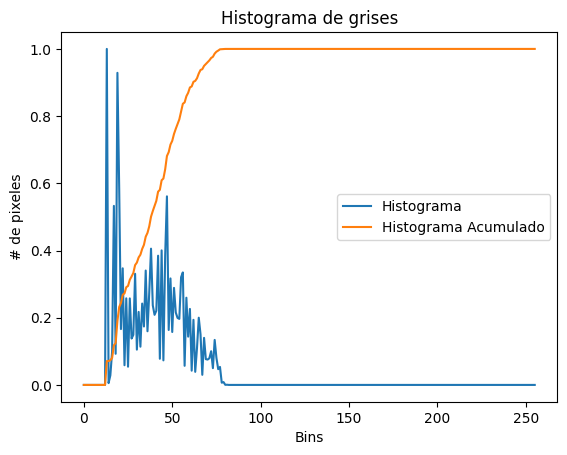

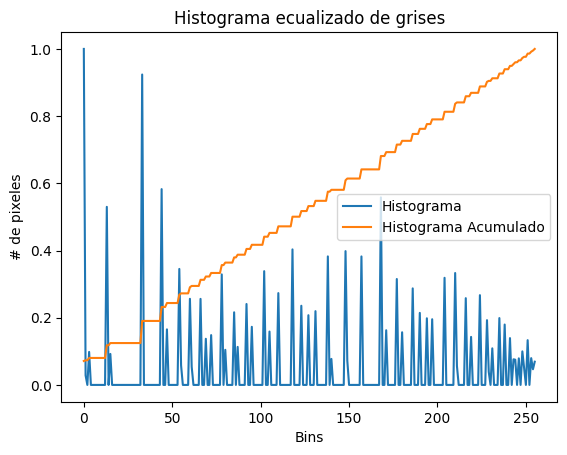

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
image_path = 'material_pract3/imagen3.png'
gray_image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Mostrar la imagen original en escala de grises
cv.imshow('Original en gris', gray_image)

# histograma de niveles de grises original
gray_hist = cv.calcHist([gray_image], [0], None, [256], [0, 256])
gray_cum = np.cumsum(gray_hist)
plt.figure()
plt.title('Histograma de grises')
plt.xlabel('Bins')
plt.ylabel('# de pixeles')
plt.plot(gray_hist/np.max(gray_hist))
plt.plot(gray_cum/np.max(gray_cum))
plt.legend(['Histograma', 'Histograma Acumulado'],loc='right')
plt.show()

# Ecualización de histogramas
gray_equalized = cv.equalizeHist(gray_image)
cv.imshow('Ecualizado de grises', gray_equalized)

# histograma de niveles de grises ecualizado
gray_equalized_hist = cv.calcHist([gray_equalized], [0], None, [256], [0, 256])
gray_cum = np.cumsum(gray_equalized_hist)
plt.figure()
plt.title('Histograma ecualizado de grises')
plt.xlabel('Bins')
plt.ylabel('# de pixeles')
plt.plot(gray_equalized_hist/np.max(gray_equalized_hist))
plt.plot(gray_cum/np.max(gray_cum))
plt.legend(['Histograma', 'Histograma Acumulado'],loc='right')
plt.show()

# Aplicar el filtro bilateral con diámetro 10 y sigmaColor y sigmaSpace de 11
bilateral_filtered = cv.bilateralFilter(gray_equalized, 10, 11, 11)
cv.imshow('Filtro Bilateral Aplicado', bilateral_filtered)

# Guardar el resultado
cv.imwrite('resultados_pract3/imagen3_salida.png', bilateral_filtered)

cv.waitKey(0)
cv.destroyAllWindows()

Este código realiza ecualización de histogramas y aplica un filtro bilateral a una imagen en escala de grises.

El histograma representa la cantidad de píxeles en cada nivel de gris (de 0 a 255), mientras que el histograma acumulado muestra la suma progresiva de esos valores, lo cual ayuda a visualizar cómo se distribuyen las intensidades en toda la imagen. Esto es útil para el ajuste de contraste en la ecualización.

Primero, carga y muestra la imagen original en gris y calcula su histograma y el histograma acumulado, mostrando ambos gráficos para visualizar la distribución de niveles de gris. Luego, aplica la ecualización de histograma, lo que mejora el contraste de la imagen, y calcula y muestra el nuevo histograma para ver el cambio en la distribución. Después, utiliza un filtro bilateral para suavizar la imagen ecualizada, preservando bordes mientras reduce el ruido. Finalmente, guarda el resultado y cierra las ventanas de visualización.

## 3)

Con la `imagen4.jpg`, crea un vídeo de 100 frames
aplicando un filtro mediano de radio (ksize) igual a 7. Aplica
el filtro en cada iteración al resultado de la iteración
anterior. Guarda el vídeo con el nombre `video4.mp4`.
(1.0 puntos) 

In [ ]:
import cv2 as cv
import numpy as np

# Cargar la imagen
image = cv.imread('material_pract3/imagen4.jpg')
alto, ancho, canales = image.shape

# Configuración del vídeo de salida
nombre_video = 'resultados_pract3/video4.mp4'
fps = 30.0 
fourcc = cv.VideoWriter_fourcc(*'mp4v')  # Codec para .mp4
video = cv.VideoWriter(nombre_video, fourcc, fps, (ancho, alto)) 

# Aplicación del filtro mediano de manera acumulativa
frame = image
for i in range(100):
    frame = cv.medianBlur(frame, 7)
    video.write(frame)

# Liberar el objeto VideoWriter
video.release()
print(f"Vídeo guardado como {nombre_video}")

Vídeo guardado como resultados_pract3/video4.mp4


Este código aplica un filtro mediano de manera acumulativa a una imagen y guarda el proceso en un video. Primero, carga la imagen y configura el video de salida. Luego, en un bucle de 100 iteraciones, aplica repetidamente el filtro mediano (con un tamaño de 7) a la imagen, suavizándola progresivamente en cada paso, y escribe cada fotograma en el video. Esto genera un efecto visual donde la imagen se va volviendo más difusa en cada fotograma, hasta que se guarda el video final.

## 4)

Calcula la norma del gradiente de la `imagen5.jpg`	
utilizando los operadores de Sobel. Umbraliza los valores de
la norma de forma que los valores mayores o iguales a 128
se igualen a 255 y los menores de 128 se igualen a 0.
Finalmente, aplica un filtro Gaussiano de radio (7,7) con
sigma=-1. Guarda el resultado con el nombre
`imagen5_salida.png`. (2.0 puntos) 

In [29]:
import cv2 as cv
import numpy as np

# Cargar la imagen
image_path = 'material_pract3/imagen5.png'
gray = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Mostrar la imagen original
cv.imshow('Original', gray)
gray = gray.astype(np.float32)

# Calcular las derivadas de Sobel
dx = cv.Sobel(gray, -1, 1, 0)
dy = cv.Sobel(gray, -1, 0, 1)

# Calcular la norma de las derivadas
norm = np.sqrt(dx*dx+dy*dy)

# Umbralizar los valores de la norma
norm[norm>=128]=255
norm[norm<128]=0

# Aplicar el filtro gaussiano
gaussian = cv.GaussianBlur(norm, (7,7), -1)
cv.imshow('Gaussian', gaussian.astype(np.uint8)) # Pasamos la imagen de float32 a uint8 antes de mostrala 

# Guardar imagen de salida
cv.imwrite('resultados_pract3/imagen5_salida.png', gaussian)

cv.waitKey(0)
cv.destroyAllWindows()


Este código aplica detección de bordes y suavizado a una imagen en escala de grises. Primero, carga la imagen y calcula las derivadas en las direcciones horizontal y vertical usando el operador de Sobel, lo cual destaca los bordes en la imagen. Luego, calcula la magnitud de estos bordes y aplica un umbral para resaltar las áreas de borde intensas. Posteriormente, aplica un filtro gaussiano para suavizar los bordes, generando un efecto más suave en la imagen final. Finalmente, muestra y guarda la imagen resultante.

## 5)

Elimina el ruido de la `imagen6.png` con alguno de los
algoritmos que conoces. Aplica el filtro múltiples veces para
eliminar lo mejor posible el ruido. Guarda la imagen de
salida con el nombre `imagen6_salida.png`. (1 punto)

In [30]:
import cv2 as cv
import numpy as np

# Cargar la imagen
image_path = 'material_pract3/imagen6.png'
image = cv.imread(image_path)

# Mostrar la imagen original
cv.imshow('Original', image)

# Aplicar el filtro mediano
median = image.copy()
for i in range(5):
    median = cv.medianBlur(median, 3)
cv.imshow('Filtrado mediano', median)

# Guardar imagen de salida
cv.imwrite('resultados_pract3/imagen6_salida.png', median)

cv.waitKey(0)
cv.destroyAllWindows()


Este código aplica un filtro mediano repetidamente a una imagen para reducir el ruido y suavizarla.
Al ser un ruido de tipo sal pimiento o ruido impulsivo, utilizamos el filtro mediano para eliminarlo. Utilizamos un tamaño de kernel de 3x3 y aplicamos el filtro 5 veces, para eliminar el ruido sin perder los detalles de la imagen.
Primero, carga la imagen y la muestra en su estado original. Luego, realiza cinco pasadas de filtro mediano y finalmente, muestra y guarda la imagen filtrada, produciendo una versión más suave y limpia de la imagen original.

## 6)

Mezcla las imágenes `imagen7_1.jpg` e `imagen7_2.png` de forma no lineal utilizando la siguiente expresión:

$$
I_3 = \frac{1 + \cos\left(\frac{\alpha}{180} \pi\right)}{2} I_1 + \frac{1 - \cos\left(\frac{\alpha}{180} \pi\right)}{2} I_2
$$

Crea un vídeo de 360 frames aumentando el ángulo en 1° en cada iteración y guárdalo con el nombre de `video7.mp4`. (2.0 puntos)


In [31]:
import numpy as np
import cv2 as cv
import math

# Cargar las imágenes
image1 = cv.imread('material_pract3/imagen7_1.jpg')
image2 = cv.imread('material_pract3/imagen7_2.png')
alto, ancho, canales = image1.shape

# # Configuración del vídeo de salida
nombre_video = 'resultados_pract3/video7.mp4'
fps = 60.0 
fourcc = cv.VideoWriter_fourcc(*'mp4v')  # Codec para .mp4
video = cv.VideoWriter(nombre_video, fourcc, fps, (ancho, alto))

# Mezccla de las imágenes
frame = image1
for i in range(360):
    image3 = (1 + math.cos(i*math.pi/180))/2 * image1.astype(np.float32) + (1 - math.cos(i*math.pi/180))/2 * image2.astype(np.float32)
    frame = image3.astype(np.uint8)
    video.write(frame)

# Liberar el objeto VideoWriter
video.release()
print(f"Vídeo guardado como {nombre_video}")

Vídeo guardado como resultados_pract3/video7.mp4


Este código genera un video donde se realiza una transición suave entre dos imágenes mediante una mezcla cíclica basada en la función coseno. Primero, carga ambas imágenes y configura el video de salida a 60 fps. En cada fotograma, calcula una combinación ponderada de las dos imágenes, oscilando el peso de cada una según el valor del coseno, lo que crea un efecto de fusión gradual de una imagen a otra y de regreso. Cada fotograma se guarda en el video final, que muestra este ciclo de mezcla, y al finalizar, guarda el archivo de video.

Se usa float32 en este código para evitar desbordamiento y pérdida de precisión al realizar operaciones de mezcla y cálculos con decimales en las imágenes.